In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

# EDA on products_train

## Missing Values

In [4]:
df = pd.read_csv('project data/products_train.csv')
df.head()

,id,locale,title,price,brand,color,size,model,material,author,desc
0,B005ZSSN10,DE,RED DRAGON Amberjack 3 - Steel Tip 22 Gramm Wo...,30.95,RED DRAGON,NaN,NaN,RDD0089,NaN,NaN,Amberjacks Steel Dartpfeile sind verfügbar in ...
1,B08PRYN6LD,DE,Simply Keto Lower Carb* Schokodrops ohne Zucke...,17.90,Simply Keto,NaN,750 g (1er Pack),NaN,NaN,NaN,🌱 NATÜRLICHE SÜSSE DURCH ERYTHRIT - Wir stelle...
2,B09MBZJ48V,DE,"Sennheiser 508377 PC 5.2 Chat, Stilvolles Mult...",68.89,Sennheiser,Multi-Colour,One size,508377,Kunstleder,NaN,3.5 MM BUCHSE - Kann problemlos an Geräte mit ...
3,B08ZN6F26S,DE,AmyBenton Auto ab 1 2 3 ahre - Baby Aufziehbar...,18.99,Amy & Benton,Animal Car,NaN,2008B,aufziehauto 1 jahr,NaN,【Auto aufziehbar】: Drücken Sie einfach leicht ...
4,B094DGRV7D,DE,PLAYMOBIL - 70522 - Cavaliere mit grauem Pony,7.17,PLAYMOBIL,Nicht Zutreffend.,OneSize,70522,Polypropylen,NaN,Inhalt: 1 Stück


In [5]:
df.shape

(1551057, 11)

In [6]:
missing_values = df.isnull().sum() 

In [7]:
missing_values

id                0
locale            0
title             8
price             0
brand         19371
color        425629
size         633966
model        789922
material     716675
author      1477548
desc         126974
dtype: int64

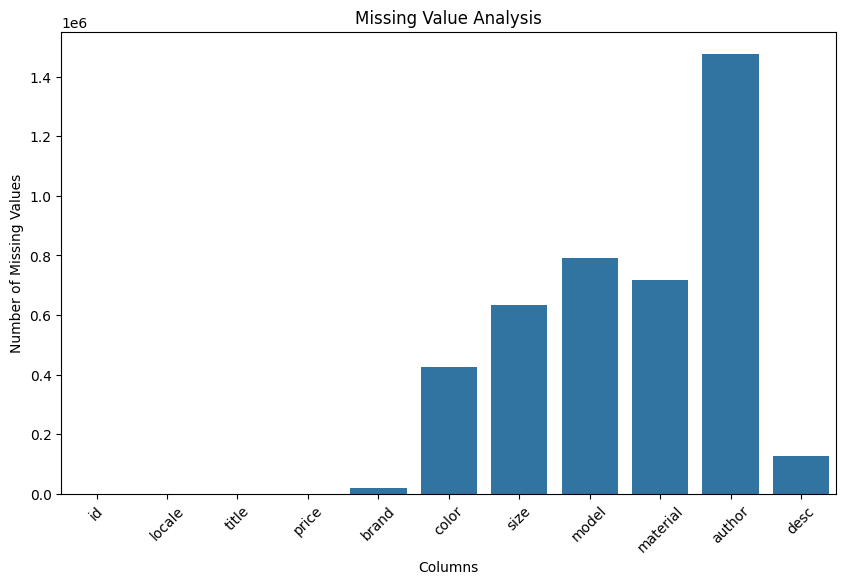

In [8]:
# Plotting missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values)
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.title('Missing Value Analysis')
plt.show()

In [9]:
missing_values

id                0
locale            0
title             8
price             0
brand         19371
color        425629
size         633966
model        789922
material     716675
author      1477548
desc         126974
dtype: int64

## Price Analysis

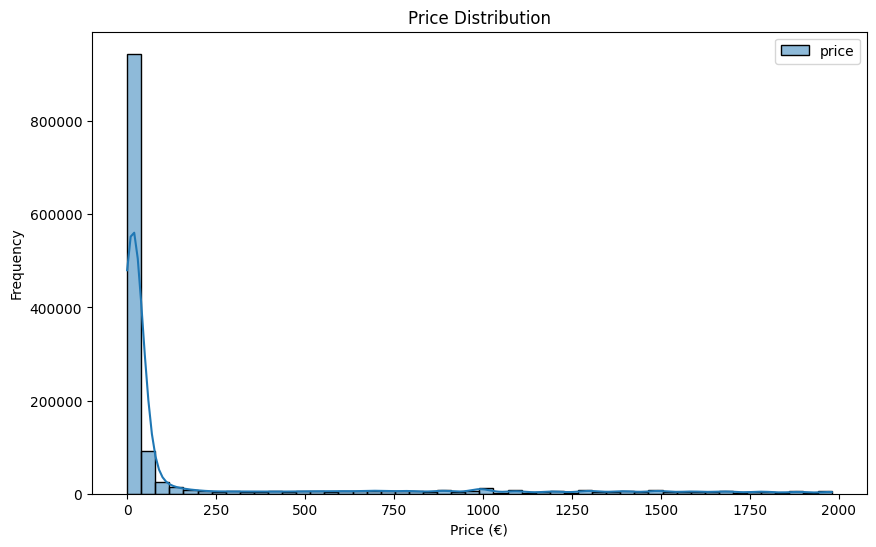

In [10]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Defining boundaries for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the DataFrame to remove outliers
df_no_outliers = df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.histplot(df_no_outliers, kde=True, bins=50, color='skyblue')
plt.title('Price Distribution')
plt.xlabel('Price (€)')
plt.ylabel('Frequency')
plt.show()

After working on EDA, I realized different coutries would have different currency for the product listings.

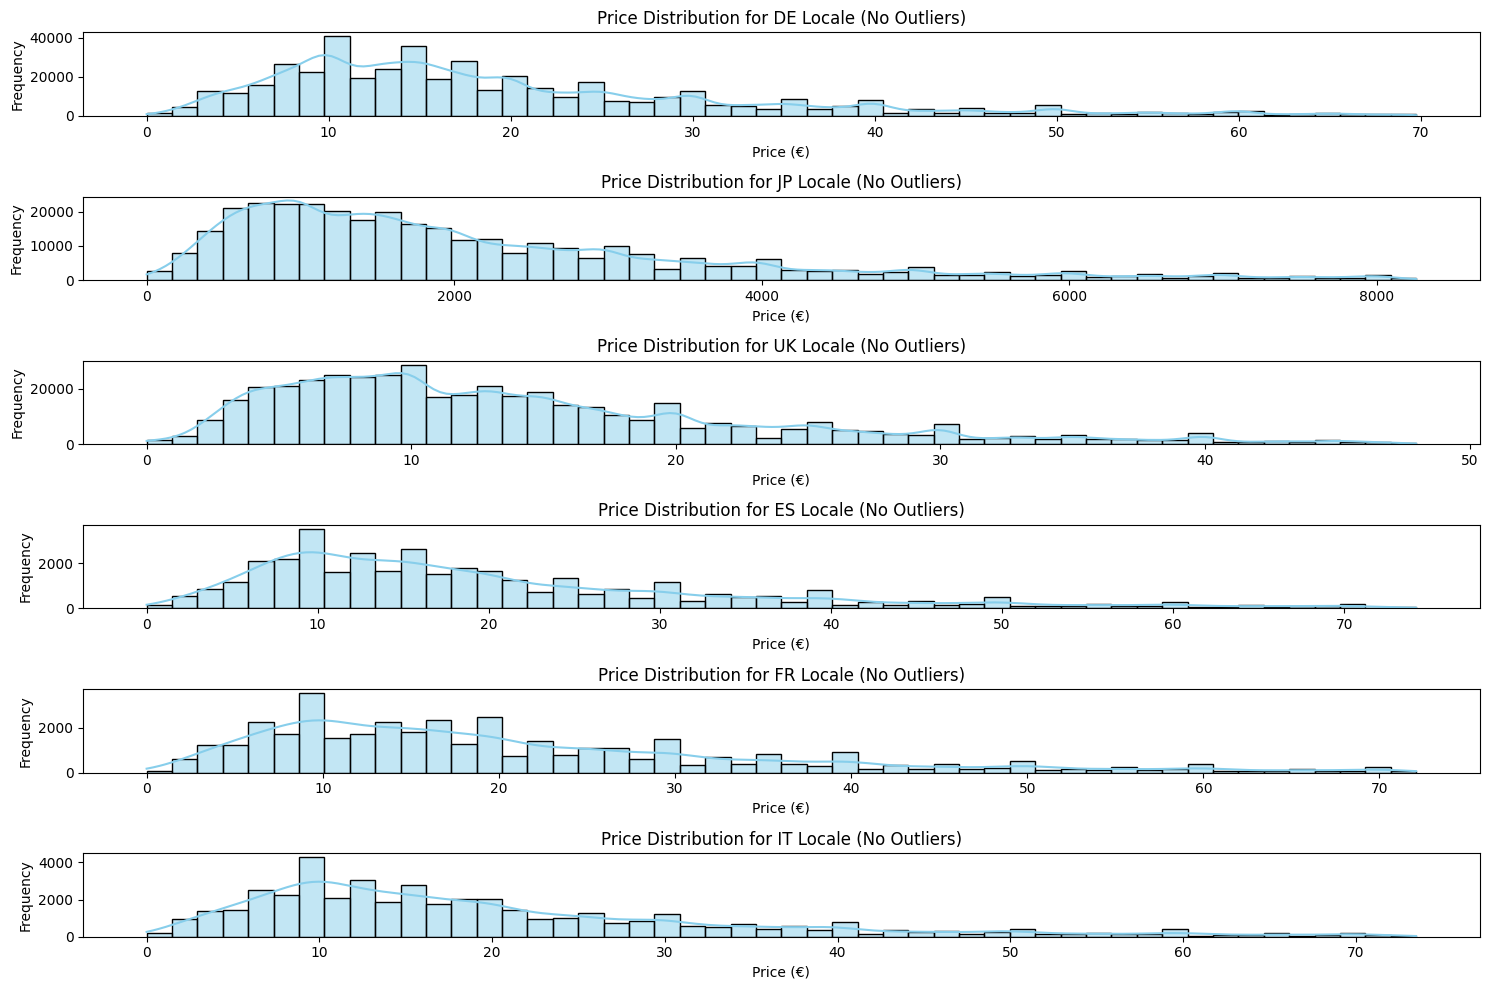

In [11]:
# Adjusting figure size for potential multiple subplots
plt.figure(figsize=(15, 10))

# Getting unique locales
locales = df['locale'].unique()

for i, locale in enumerate(locales, start=1):
    # Selecting data for the current locale
    locale_data = df[df['locale'] == locale]
    
    # Calculating IQR and defining boundaries for outliers for the current locale
    Q1 = locale_data['price'].quantile(0.25)
    Q3 = locale_data['price'].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Filtering to remove outliers
    filtered_data = locale_data[(locale_data['price'] >= lower_bound) & (locale_data['price'] <= upper_bound)]
    
    # Creating a subplot for each locale
    plt.subplot(len(locales), 1, i)
    sns.histplot(filtered_data['price'], kde=True, bins=50, color='skyblue')
    plt.title(f'Price Distribution for {locale} Locale (No Outliers)')
    plt.xlabel('Price (€)')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


## Brand Analysis

In [12]:
# Brand Analysis: Counting unique brands and frequency of products per brand
brand_counts = df_no_outliers['brand'].value_counts()

# Number of unique brands
unique_brands = df_no_outliers['brand'].nunique()

unique_brands, brand_counts

(156597,
 brand
 Amazon Basics                         4719
 Apple                                 3596
 LEGO                                  3549
 Independently published               3380
 Generic                               3044
                                       ... 
 Eden Books                               1
 The Gourmet Chocolate Pizza Co Ltd       1
 Dr. Rudolf Liebe Nachfolger              1
 3XS                                      1
 Ymea                                     1
 Name: count, Length: 156597, dtype: int64)

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/3631236550.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='coolwarm')
/Users/minwoo/Desktop/DS5720 Network/HW/HW2/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Desktop/DS5720 Network/HW/HW2/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/minwoo/Desktop/DS5720 Network/HW/HW2/.venv/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 12467 (\N{KATAKANA LETTER KO}) missing from current font.
  fig.c

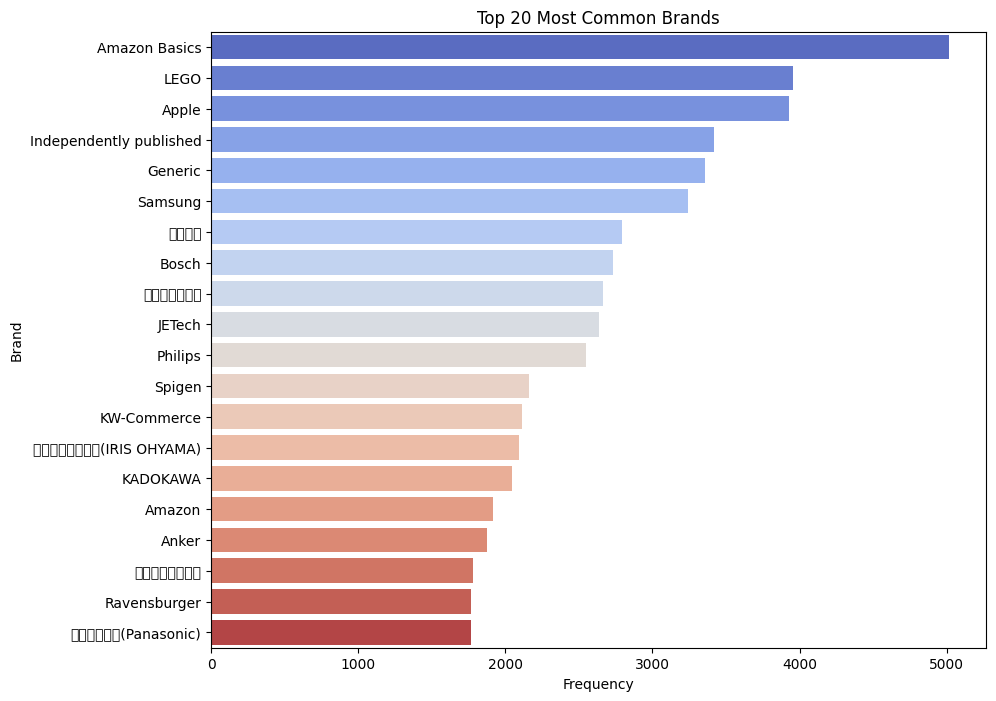

In [13]:
# Counting the frequency of products per brand
brand_counts_large = df['brand'].value_counts()

# Limiting to the top 20 brands
top_20_brands = brand_counts_large.head(20)

# Plotting the top 20 brands
plt.figure(figsize=(10, 8))
sns.barplot(x=top_20_brands.values, y=top_20_brands.index, palette='coolwarm')
plt.xlabel('Frequency')
plt.ylabel('Brand')
plt.title('Top 20 Most Common Brands')
plt.show()


## Locale

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/2977372146.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locale_counts.index, y=locale_counts.values, palette='Set2')


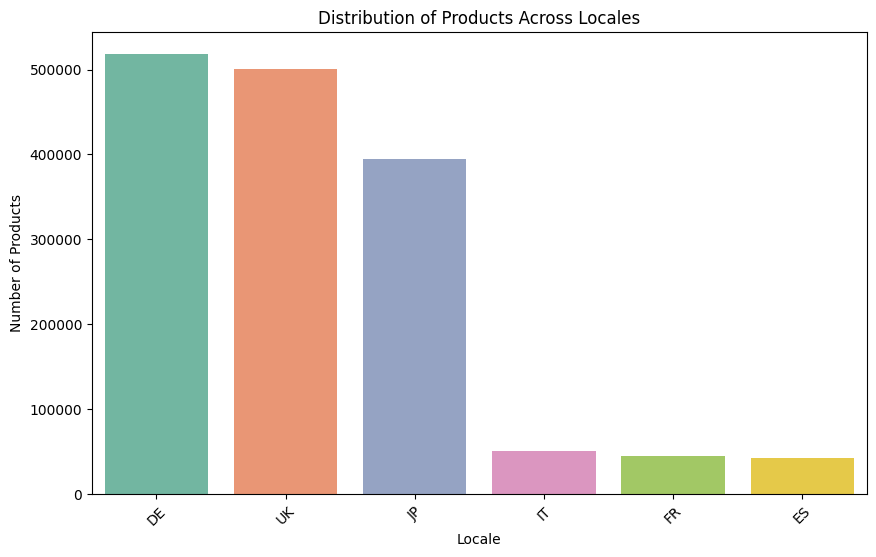

In [14]:

# Counting the frequency of products per locale
locale_counts = df['locale'].value_counts()

# Plotting the distribution of products across locales
plt.figure(figsize=(10, 6))
sns.barplot(x=locale_counts.index, y=locale_counts.values, palette='Set2')
plt.xlabel('Locale')
plt.ylabel('Number of Products')
plt.title('Distribution of Products Across Locales')
plt.xticks(rotation=45)
plt.show()

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1193345995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='brand', data=locale_data, palette='coolwarm')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1193345995.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='brand', data=locale_data, palette='coolwarm')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1193345995.py:15: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from current font.
  plt.tight_layout()
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1193345995.py:15: UserWarning: Glyph 12524 (\N{KATAKANA LETTER RE})

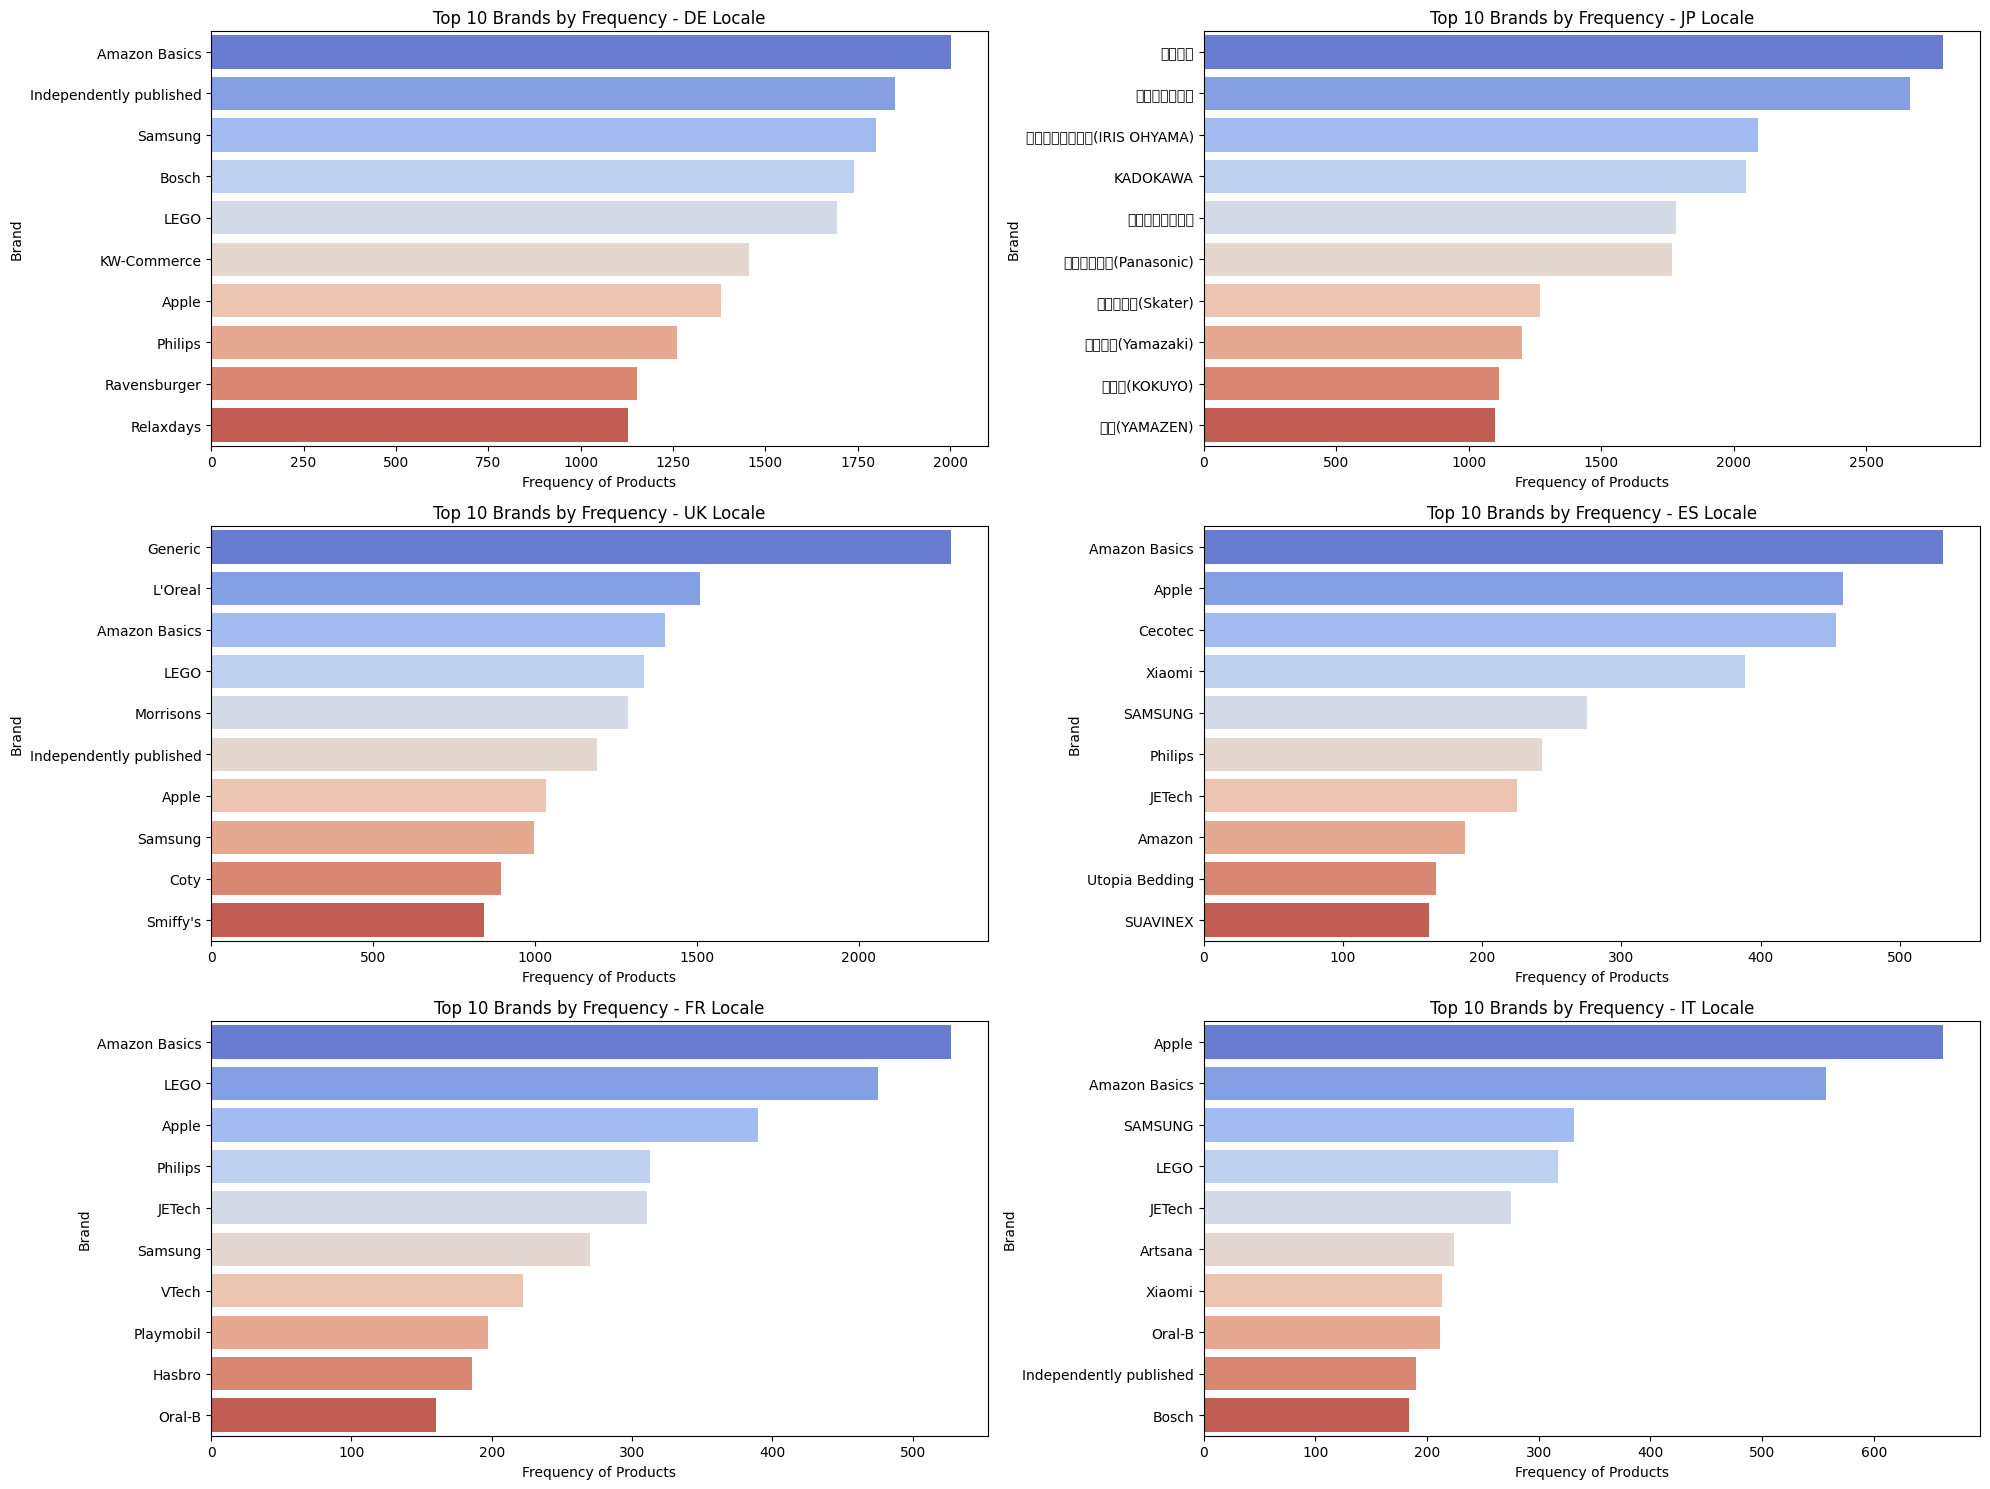

In [15]:
# Grouping by locale and then finding the top 10 brands within each locale
top_brands_per_locale = df.groupby('locale')['brand'].value_counts().groupby(level=0).head(10)

# Adjusting the figure size for clarity
plt.figure(figsize=(20, 15))

# Creating a subplot for each locale
for i, locale in enumerate(df['locale'].unique(), 1):
    plt.subplot(3, 2, i)  # Adjust the grid size based on the number of unique locales
    locale_data = top_brands_per_locale.loc[locale].reset_index(name='Frequency')
    sns.barplot(x='Frequency', y='brand', data=locale_data, palette='coolwarm')
    plt.title(f'Top 10 Brands by Frequency - {locale} Locale')
    plt.xlabel('Frequency of Products')
    plt.ylabel('Brand')
    plt.tight_layout()

plt.show()



## Color & Size

In [16]:
# Calculating the most common color and size for each locale
most_common_color = df.groupby('locale')['color'].agg(pd.Series.mode)
most_common_size = df.groupby('locale')['size'].agg(pd.Series.mode)

# Displaying the results
most_common_color, most_common_size


(locale
 DE    Schwarz
 ES      Negro
 FR       Noir
 IT       Nero
 JP       ブラック
 UK      Black
 Name: color, dtype: object,
 locale
 DE           1 Stück (1er Pack)
 ES      1 Unidad (Paquete de 1)
 FR           1 Unité (Lot de 1)
 IT    1 Unità (Confezione da 1)
 JP                     1個 (x 1)
 UK                     One Size
 Name: size, dtype: object)

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1337771798.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='color', data=locale_colors, palette='pastel')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1337771798.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='color', data=locale_colors, palette='pastel')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1337771798.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='color', data=l

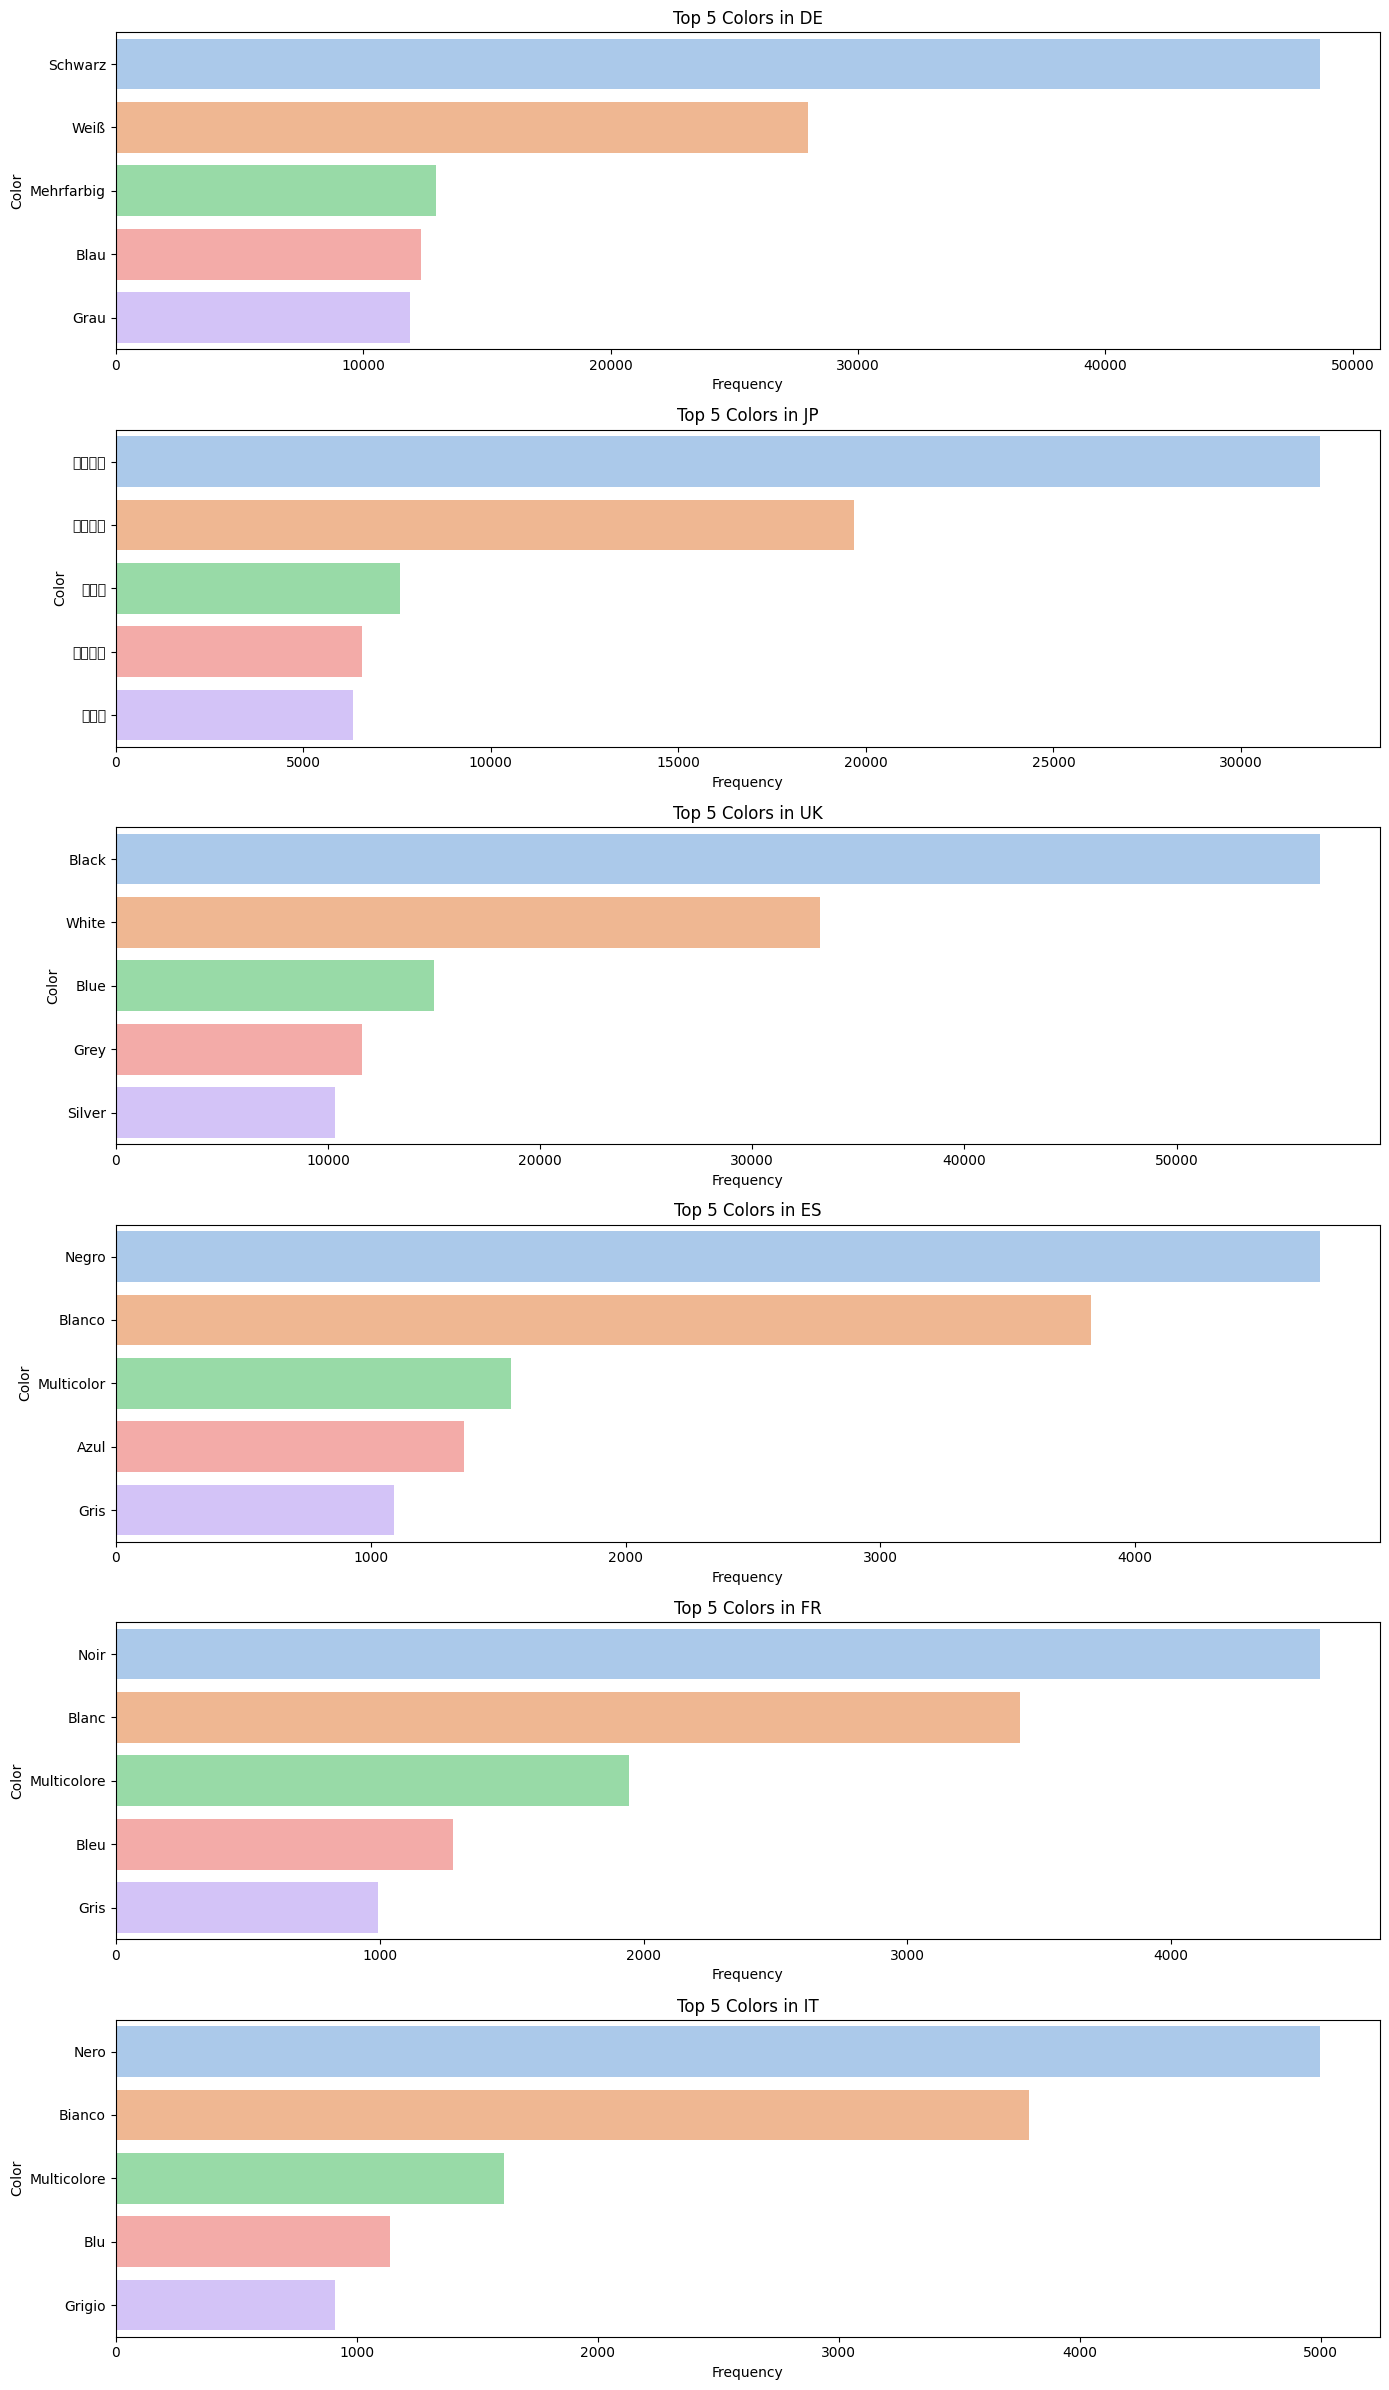

In [17]:
# First, calculate the top 4 colors for each locale
top_colors = df.groupby('locale')['color'].value_counts().groupby(level=0).head(5)

# Creating subplots for each locale's top 4 colors
unique_locales = df['locale'].unique()
n_locales = len(unique_locales)

plt.figure(figsize=(14, n_locales * 4))  # Adjust figure size based on number of locales

for i, locale in enumerate(unique_locales, 1):
    plt.subplot(n_locales, 1, i)
    # Filtering top colors for the current locale
    locale_colors = top_colors[locale].reset_index(name='Frequency')
    sns.barplot(x='Frequency', y='color', data=locale_colors, palette='pastel')
    plt.title(f'Top 5 Colors in {locale}')
    plt.xlabel('Frequency')
    plt.ylabel('Color')

plt.tight_layout()
plt.show()


/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1873557610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='size', data=locale_sizes, palette='pastel')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1873557610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='size', data=locale_sizes, palette='pastel')
/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/1873557610.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Frequency', y='size', data=locale

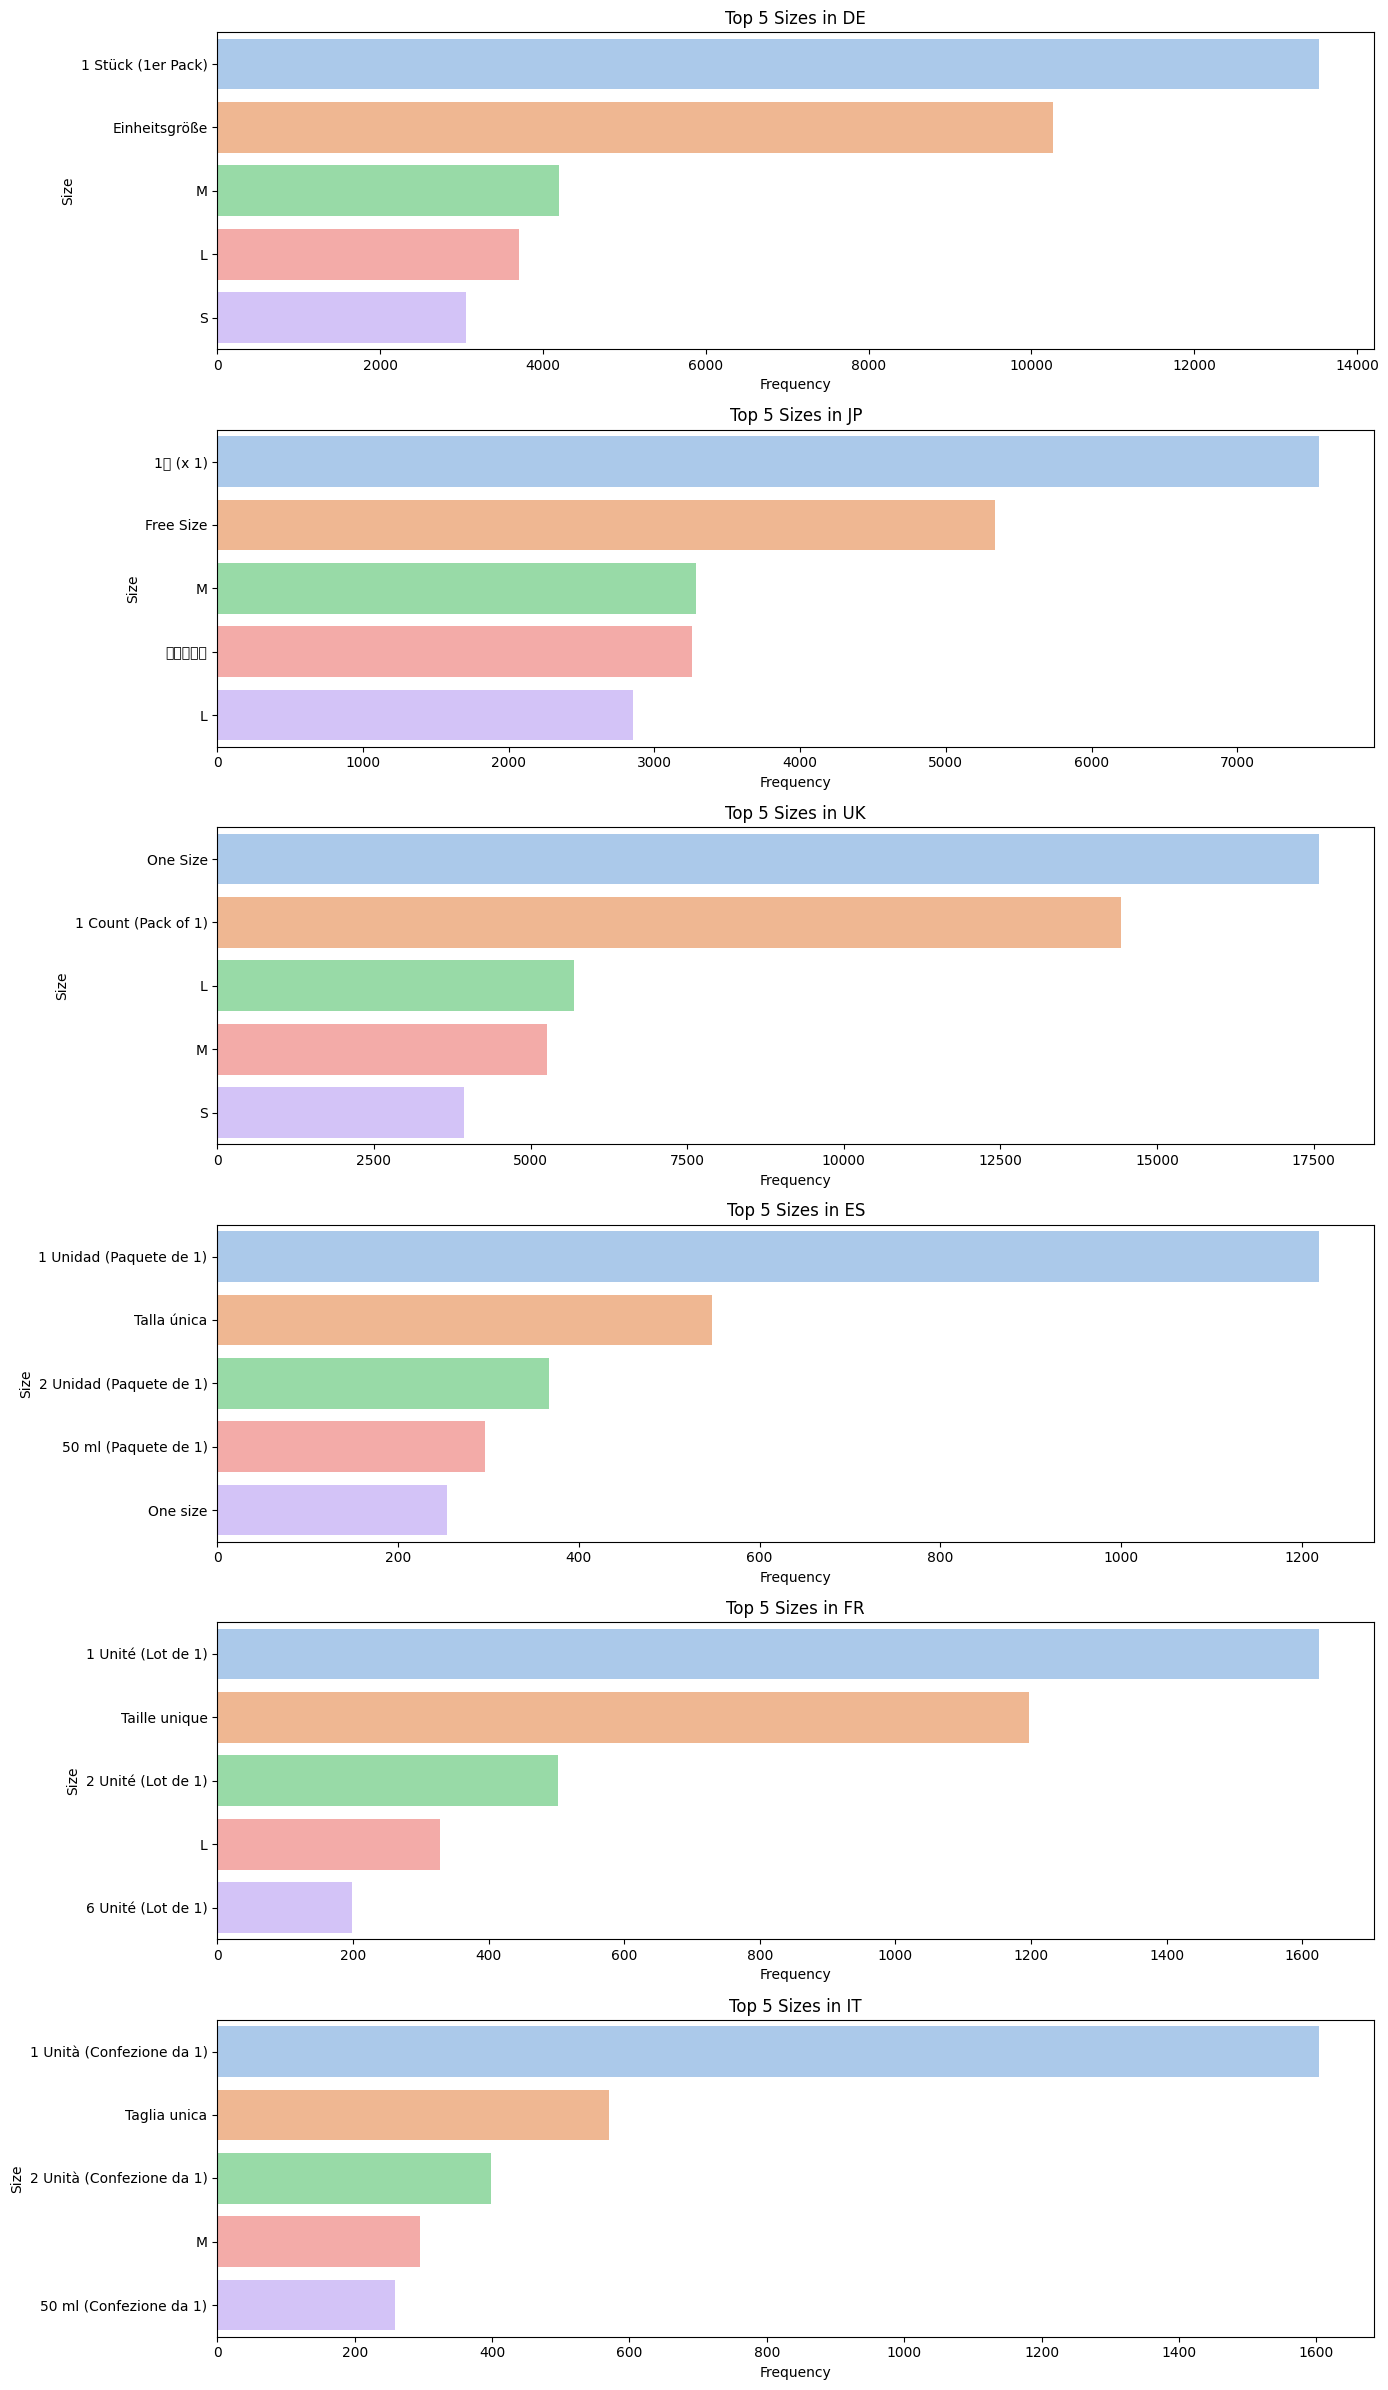

In [18]:
# Calculate the top 4 sizes for each locale
top_sizes = df.groupby('locale')['size'].value_counts().groupby(level=0).head(5)

# Creating subplots for each locale's top 4 sizes
plt.figure(figsize=(14, n_locales * 4))  # Adjust figure size based on number of locales

for i, locale in enumerate(unique_locales, 1):
    plt.subplot(n_locales, 1, i)
    # Filtering top sizes for the current locale
    locale_sizes = top_sizes[locale].reset_index(name='Frequency')
    sns.barplot(x='Frequency', y='size', data=locale_sizes, palette='pastel')
    plt.title(f'Top 5 Sizes in {locale}')
    plt.xlabel('Frequency')
    plt.ylabel('Size')

plt.tight_layout()
plt.show()


# Session train

In [19]:
df = pd.read_csv('project data/sessions_train.csv')
df.head()


,prev_items,next_item,locale
0,['B09W9FND7K' 'B09JSPLN1M'],B09M7GY217,DE
1,['B076THCGSG' 'B007MO8IME' 'B08MF65MLV' 'B001B...,B001B4THSA,DE
2,['B0B1LGXWDS' 'B00AZYORS2' 'B0B1LGXWDS' 'B00AZ...,B0767DTG2Q,DE
3,['B09XMTWDVT' 'B0B4MZZ8MB' 'B0B7HZ2GWX' 'B09XM...,B0B4R9NN4B,DE
4,['B09Y5CSL3T' 'B09Y5DPTXN' 'B09FKD61R8'],B0BGVBKWGZ,DE


## Missing Values

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/2601433783.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=missing_values.index, y=missing_values.values, palette='Set3')


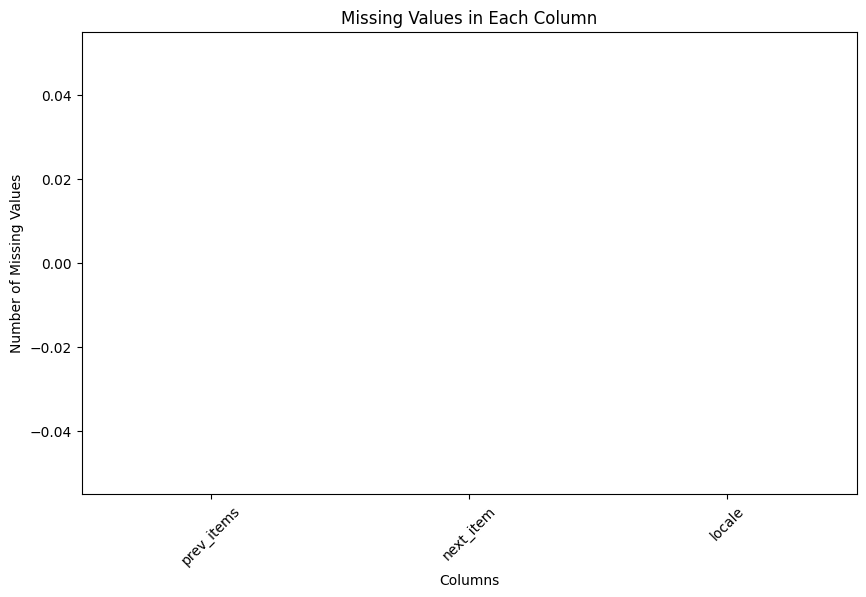

In [20]:
# Check for missing values
missing_values = df.isnull().sum()

# Visualizing missing values
plt.figure(figsize=(10, 6))
sns.barplot(x=missing_values.index, y=missing_values.values, palette='Set3')
plt.title('Missing Values in Each Column')
plt.xlabel('Columns')
plt.ylabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()


## Locale

/var/folders/vq/8_5y1g_97cn0gnnv_9ttj6f40000gn/T/ipykernel_74051/3722417506.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=locale_counts.index, y=locale_counts.values, palette='Accent')


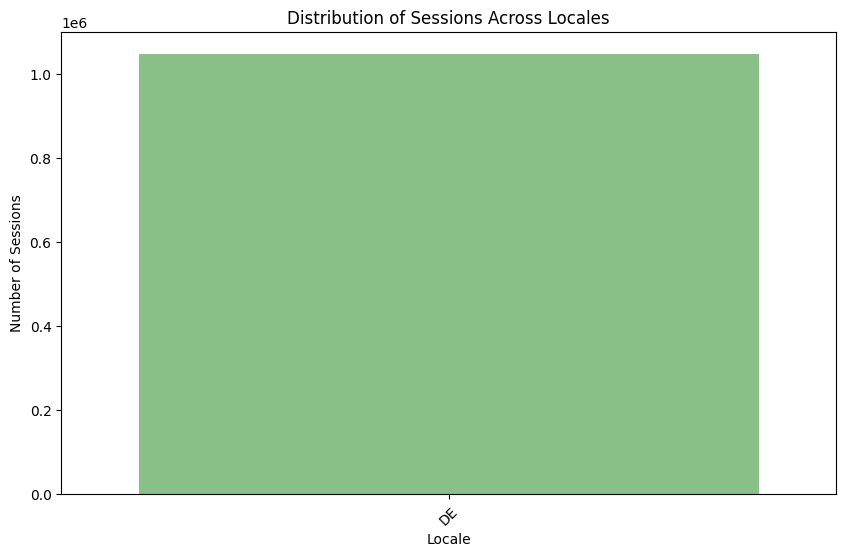

In [21]:
# Counting the number of sessions per locale
locale_counts = df['locale'].value_counts()

# Visualizing the distribution of sessions across locales
plt.figure(figsize=(10, 6))
sns.barplot(x=locale_counts.index, y=locale_counts.values, palette='Accent')
plt.title('Distribution of Sessions Across Locales')
plt.xlabel('Locale')
plt.ylabel('Number of Sessions')
plt.xticks(rotation=45)
plt.show()


## Common Items

In [22]:
from collections import Counter

# Adjusting the parsing of prev_items: split the string by space to get items
# all_prev_items_flat = [item for sublist in df['prev_items'].str.split(' ') for item in sublist]

all_prev_items_flat = [
    item for sublist in df['prev_items']
    for item in sublist.replace('[', '').replace(']', '').split(' ')
    if item  # This filters out any empty strings resulting from the split
]


# Count occurrences and get the top 10 prev_items
prev_items_counts = Counter(all_prev_items_flat)
top_10_prev_items = prev_items_counts.most_common(10)

# Count occurrences of next_item and get the top 10
next_item_counts = Counter(df['next_item'])
top_10_next_items = next_item_counts.most_common(10)

top_10_prev_items, top_10_next_items

([("'B0B1MPZWJG'", 1303),
  ("'B0BDML9477'", 1287),
  ("'B08GWS298V'", 1285),
  ("'B09NQGVSPD'", 1117),
  ("'B0922JX27X'", 1077),
  ("'B07R4PN3MV'", 1074),
  ("'B08H93ZRK9'", 1069),
  ("'B0BFJGXWDV'", 1055),
  ("'B0B2Q4ZRDW'", 990),
  ("'B00GWUSE1O'", 942)],
 [('B08G4DFMNN', 30),
  ('B07LFRP5SS', 30),
  ('B01KXHHTZS', 30),
  ('B09K445HXZ', 30),
  ('B01N3LKN0B', 30),
  ('B09VH599VG', 30),
  ('B08L5TKXW3', 30),
  ('B09P2RQ83K', 30),
  ('B09CGRSL44', 30),
  ('B093C9FN7W', 30)])

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

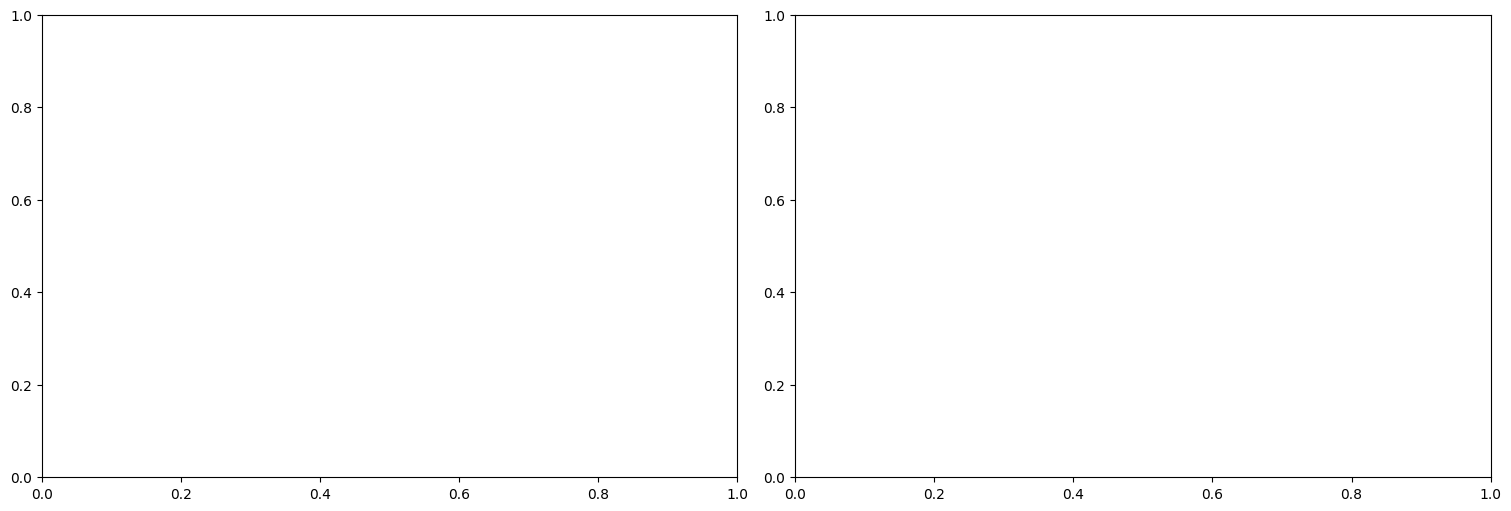

In [23]:
# Unique locales in the dataset
locales = df['locale'].unique()

# Initialize the figure for subplots
fig, axes = plt.subplots(nrows=len(locales), ncols=2, figsize=(15, 5*len(locales)), constrained_layout=True)

# Removing this as constrained_layout should handle the spacing
# fig.subplots_adjust(hspace=0.5)

for i, locale in enumerate(locales):
    # Filter data by locale
    locale_data = df[df['locale'] == locale]
    
    # Correctly parsing prev_items by removing brackets and splitting by space
    all_prev_items = [
        item for items_str in locale_data['prev_items']
        for item in items_str.replace('[', '').replace(']', '').split(' ') if item
    ]
    top_prev_items = Counter(all_prev_items).most_common(10)
    
    # Count occurrences of next_item and get top 10
    top_next_items = Counter(locale_data['next_item']).most_common(10)
    
    # Plotting
    # Check if there are items to plot to avoid error with zip(*) on empty lists
    if top_prev_items:
        prev_item_labels, prev_item_counts = zip(*top_prev_items)
        sns.barplot(x=list(prev_item_counts), y=list(prev_item_labels), ax=axes[i, 0], palette='Blues_d')
    axes[i, 0].set_title(f'Top 10 Previous Items in {locale}')
    axes[i, 0].set_xlabel('Frequency')
    axes[i, 0].set_ylabel('Item IDs')
    
    if top_next_items:
        next_item_labels, next_item_counts = zip(*top_next_items)
        sns.barplot(x=list(next_item_counts), y=list(next_item_labels), ax=axes[i, 1], palette='Greens_d')
    axes[i, 1].set_title(f'Top 10 Next Items in {locale}')
    axes[i, 1].set_xlabel('Frequency')
    axes[i, 1].set_ylabel('Item IDs')

plt.show()


## Session Length

In [ ]:
df['session_length'] = df['prev_items'].apply(lambda x: x.count(' ') + 1)


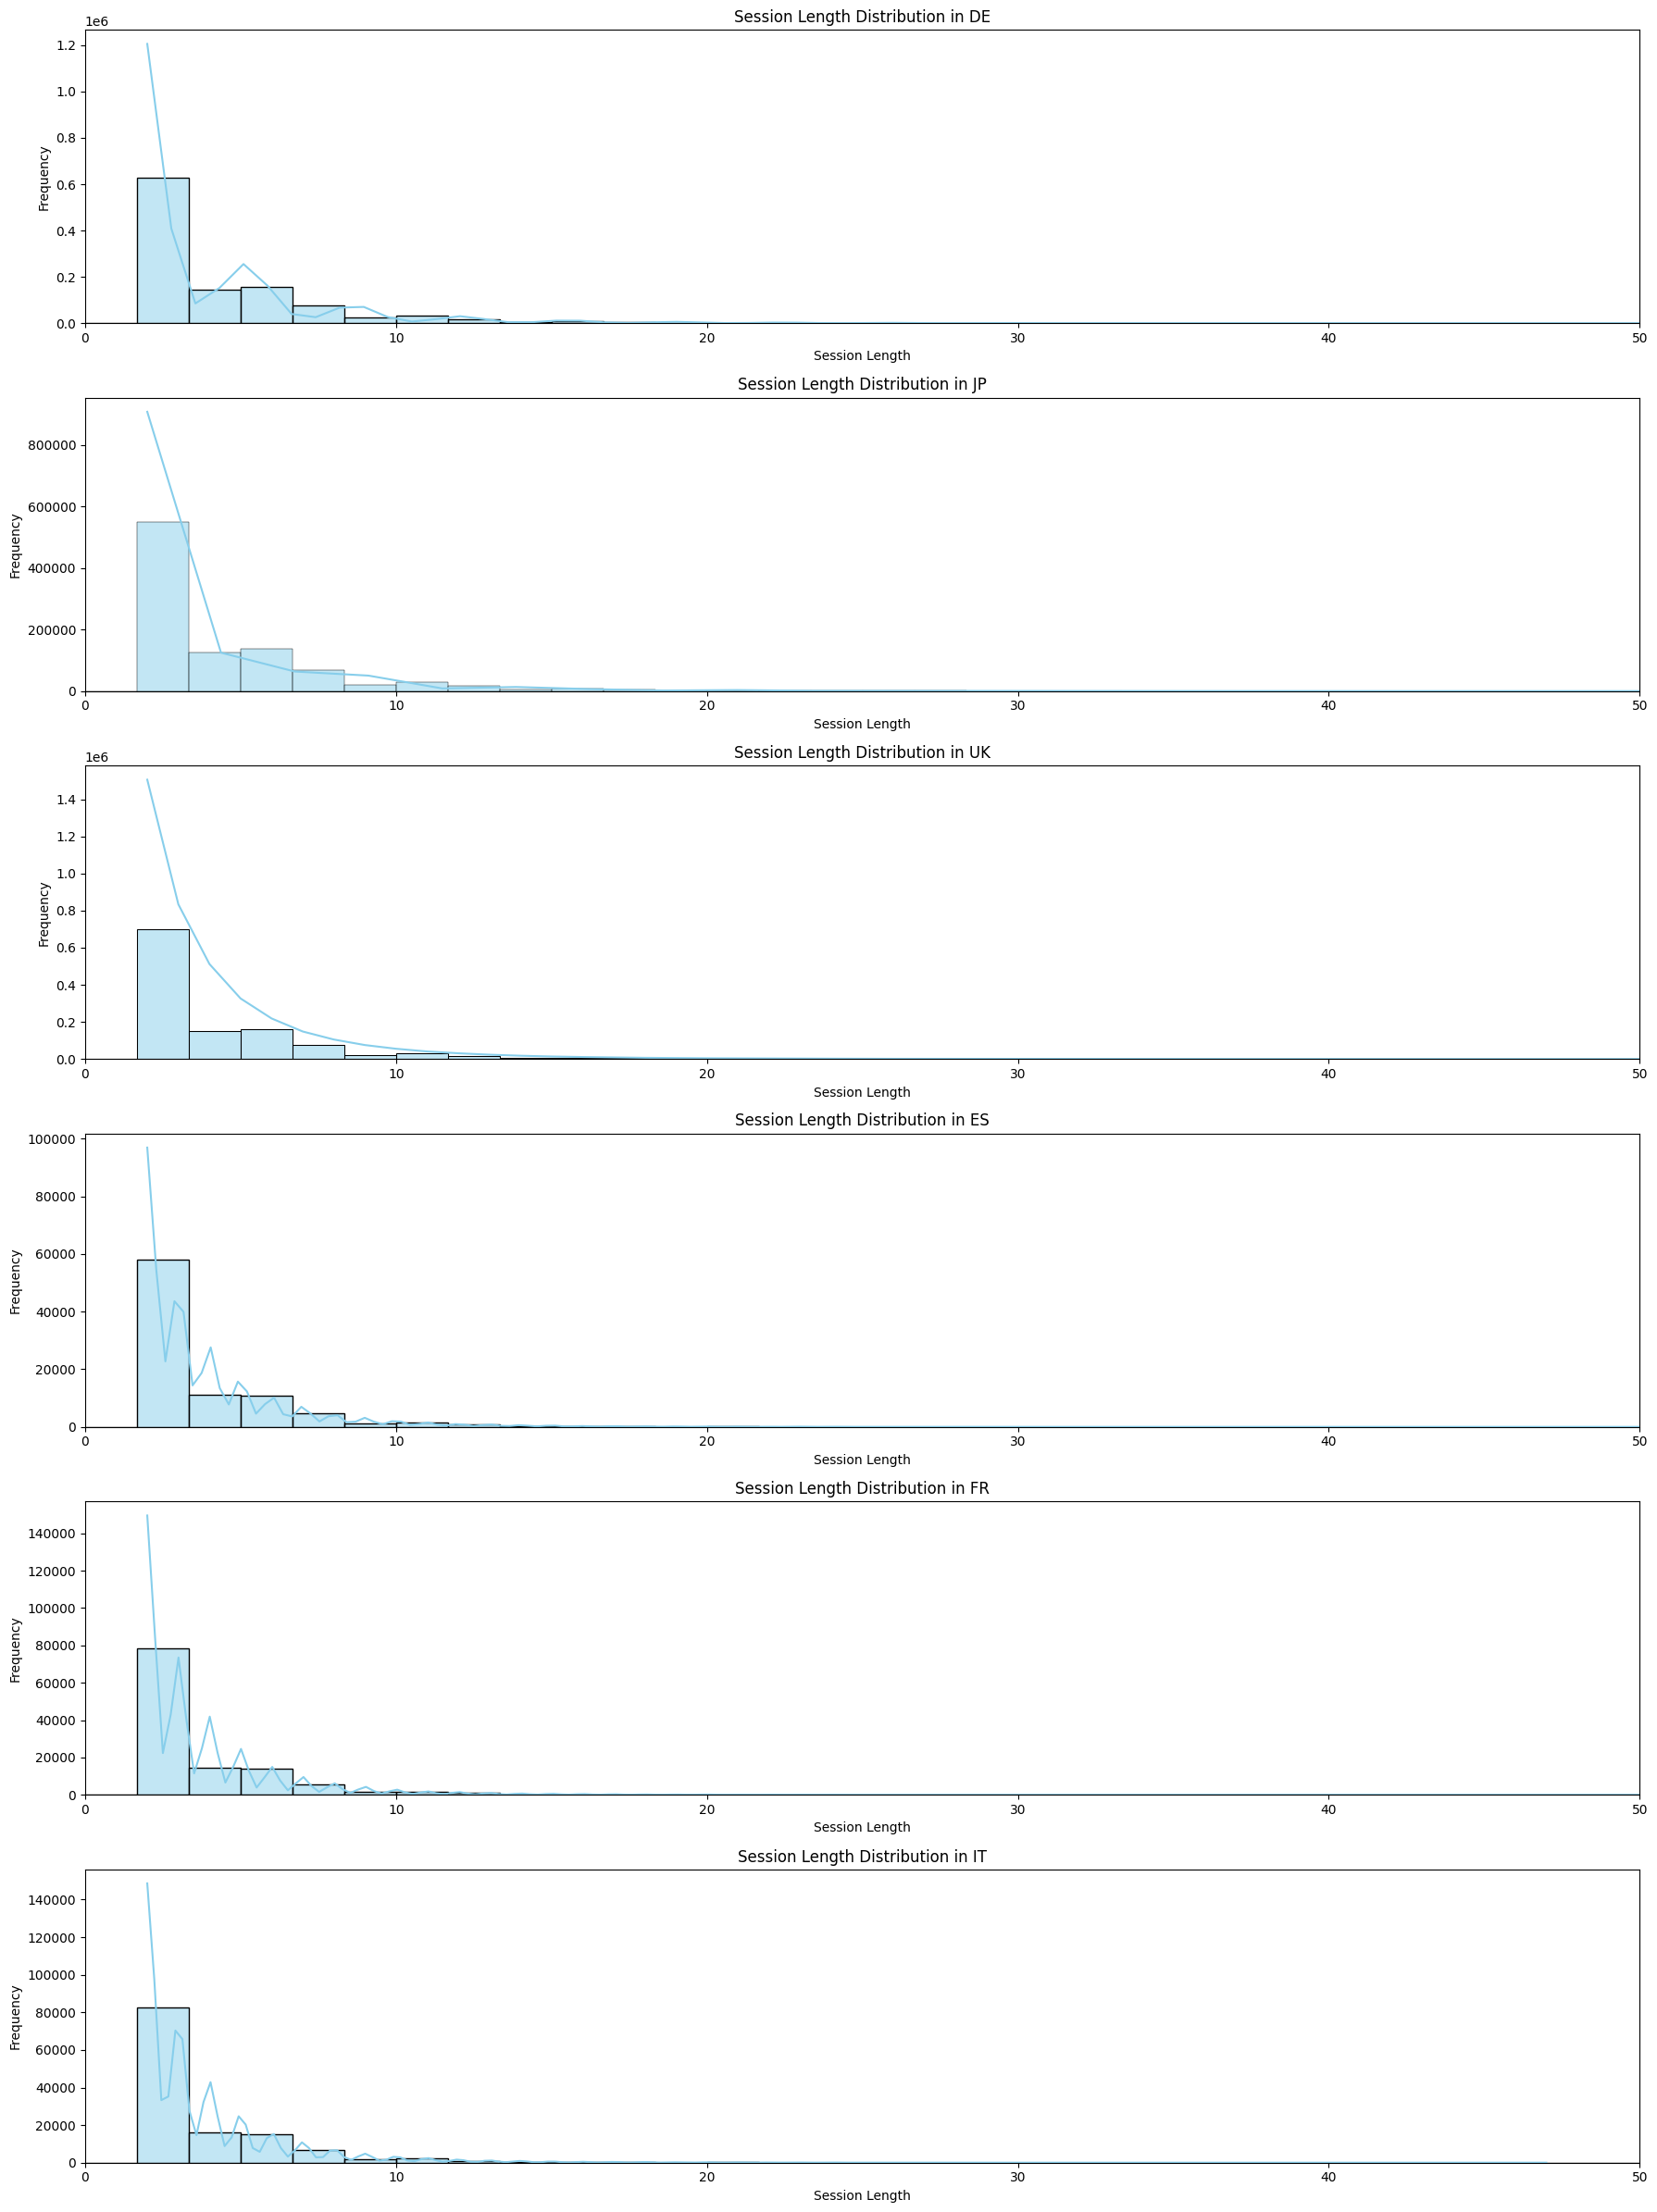

In [ ]:
locales = df['locale'].unique()

plt.figure(figsize=(18, 4 * len(locales)))  # Adjust figure size as needed

for i, locale in enumerate(locales, 1):
    plt.subplot(len(locales), 1, i)
    locale_data = df[df['locale'] == locale]
    sns.histplot(locale_data['session_length'], bins=30, kde=True, color='skyblue', binrange=(0, 50))
    plt.title(f'Session Length Distribution in {locale}')
    plt.xlabel('Session Length')
    plt.ylabel('Frequency')
    plt.xlim(0, 50)  # Setting the x-axis range from 0 to 50

plt.tight_layout()
plt.show()


## Item Transition

In [ ]:
from collections import Counter
from itertools import combinations
import pandas as pd

# Assuming df['prev_items'] contains lists of item IDs

# Initialize a Counter object to keep track of pair frequencies
pair_counts = Counter()

# Iteratively process each session's item pairs to update counts
for items in df['prev_items']:
    # Generate all pairs for the current session's items
    # and update their counts in the Counter object
    for pair in combinations(items, 2):
        pair_counts[pair] += 1

# Now, extract the 10 most common pairs
most_common_pairs = pair_counts.most_common(10)


KeyboardInterrupt: 

In [ ]:
# Assuming 'prev_items' are already lists
df['last_prev_item'] = df['prev_items'].apply(lambda x: x[-1] if x else None)

# Group by 'last_prev_item' and count occurrences of 'next_item'
transition_counts = df.groupby('last_prev_item')['next_item'].value_counts()

# Get the most common next_item for the top 10 last_prev_items
most_common_transitions = transition_counts.groupby(level=0).head(1).sort_values(ascending=False).head(10)


In [ ]:
pairs, counts = zip(*most_common_pairs)
pair_labels = [f"{pair[0]} & {pair[1]}" for pair in pairs]

plt.figure(figsize=(10, 8))
sns.barplot(x=list(counts), y=pair_labels, palette='Paired')
plt.title('Top 10 Most Common Item Pairs in prev_items')
plt.xlabel('Frequency')
plt.ylabel('Item Pairs')
plt.show()

In [ ]:
from itertools import combinations
import pandas as pd

def generate_pairs(items_str):
    items = items_str.split(' ')  # Assuming items_str is a space-separated string
    return list(combinations(items, 2))

# Apply this function to each row of the DataFrame and explode the resulting lists into a flat Series
pair_series = df['prev_items'].apply(generate_pairs).explode()
